In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
import sys
import logging

In [2]:
sys.path.insert(0, os.path.abspath('..'))

In [3]:
# Load scripts from path
sys.path.append('/home/olani/Documents/kifiya/week4/Rossmann-store-sales/scripts')

In [4]:
from importlib import reload
import scripts.preprocessing
reload(scripts.preprocessing)

<module 'scripts.preprocessing' from '/home/olani/Documents/kifiya/week4/Rossmann-store-sales/scripts/preprocessing.py'>

In [5]:
from scripts.data_loader import load_data
from scripts.preprocessing import preprocess_data, feature_engineering
from scripts.utils import setup_logger

In [6]:
# Ignore some future warnings triggered when training
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

In [7]:
# Set up logging
setup_logger()

<RootLogger root (INFO)>

In [8]:
# Load data
train_df = load_data("../data/raw/train.csv")
test_df = load_data("../data/raw/test.csv")
store_df = load_data("../data/raw/store.csv")

In [9]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [11]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [14]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
# Preprocess train and test datasets
train_df = preprocess_data(train_df, is_train=True)
test_df = preprocess_data(test_df, is_train=False)
store_df = preprocess_data(store_df, is_train=True)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  category      
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(7)
memory usage: 63.1 MB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  category      
 7   SchoolHoliday  41088 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(5)
memory usage: 2.2 MB


In [18]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


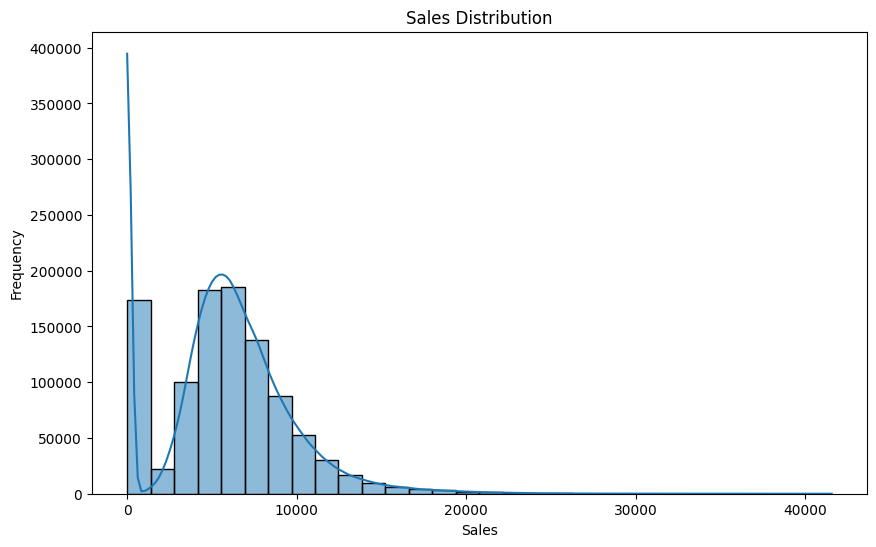

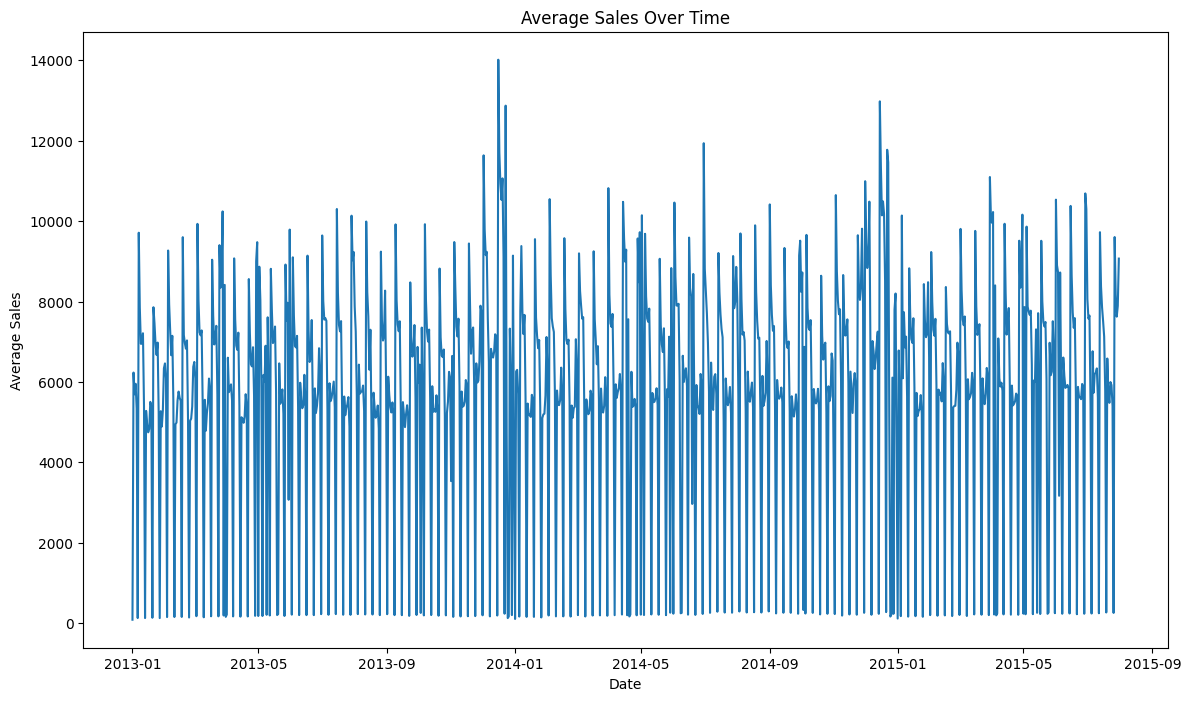

In [19]:
# Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(train_df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Store Sales Over Time
plt.figure(figsize=(14,8))
train_df['Date'] = pd.to_datetime(train_df['Date'])
sales_over_time = train_df.groupby('Date')['Sales'].mean()
plt.plot(sales_over_time)
plt.title('Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.show()

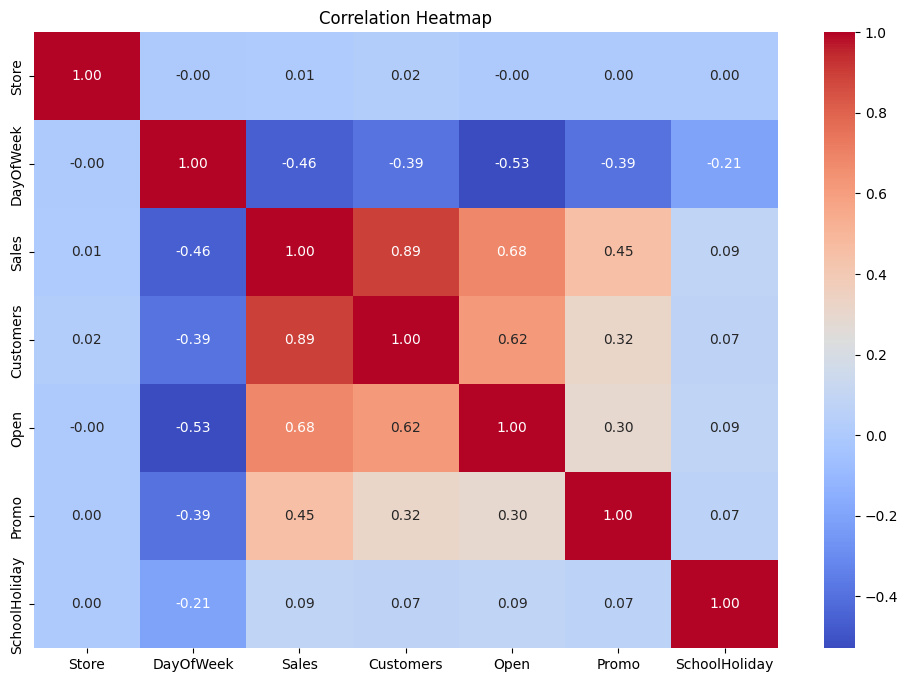

In [20]:
# Drop non-numeric columns for correlation analysis
numeric_df = train_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Outlier Detection

In [21]:
from scripts.preprocessing import handle_outliers

# Handle outliers in the training dataset (e.g., sales outliers)
train_df = handle_outliers(train_df)

# Verify the shape after removing outliers
print(f"Train Data Shape After Outlier Handling: {train_df.shape}")

Train Data Shape After Outlier Handling: (1007478, 9)


### Feature Engineering

In [22]:
# Apply feature engineering
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

# Display the updated dataframe with new features
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


### Check for promotion distribution in both training and test sets

<Figure size 1200x600 with 0 Axes>

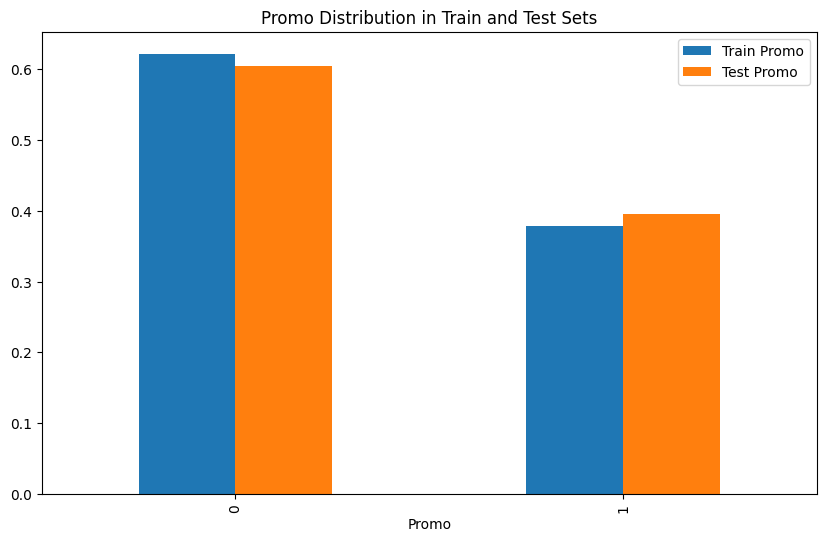

In [23]:
# Checking promotion distribution in train and test datasets
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
train_promo = train_df['Promo'].value_counts(normalize=True)
test_promo = test_df['Promo'].value_counts(normalize=True)

# Bar plot for comparison
promo_comparison = pd.DataFrame({
    'Train Promo': train_promo,
    'Test Promo': test_promo
}).plot(kind='bar', figsize=(10, 6), title='Promo Distribution in Train and Test Sets')
plt.show()

### Check & compare sales behavior before, during, and after holidays

In [24]:
# Checking sales around holidays
train_df['BeforeHoliday'] = train_df['StateHoliday'].shift(1).fillna('0')
train_df['AfterHoliday'] = train_df['StateHoliday'].shift(-1).fillna('0')

# Group by holidays and check sales
holiday_sales = train_df.groupby('StateHoliday')['Sales'].mean()
before_holiday_sales = train_df.groupby('BeforeHoliday')['Sales'].mean()
after_holiday_sales = train_df.groupby('AfterHoliday')['Sales'].mean()

# Display the results
print(f"Holiday Sales:\n{holiday_sales}")
print(f"Sales Before Holidays:\n{before_holiday_sales}")
print(f"Sales After Holidays:\n{after_holiday_sales}")

Holiday Sales:
StateHoliday
0    5804.968871
a     240.958847
b     143.372414
c     137.298901
Name: Sales, dtype: float64
Sales Before Holidays:
BeforeHoliday
0    5788.494065
a    1035.139345
b     146.373763
c     138.974847
Name: Sales, dtype: float64
Sales After Holidays:
AfterHoliday
0    5788.452529
a    1035.812237
b     150.083958
c     140.674969
Name: Sales, dtype: float64


In [25]:
# Extract unique holiday dates from the dataset
holiday_dates = train_df[train_df['StateHoliday'] != '0']['Date'].unique()
holiday_dates = pd.to_datetime(holiday_dates)

# Set the number of days to consider before and after the holiday
before_days = 7  # Days before the holiday
after_days = 7   # Days after the holiday

# Create an empty list to hold the results
sales_behavior = []

for holiday in holiday_dates:
    # Define the periods
    before_start = holiday - pd.Timedelta(days=before_days)
    before_end = holiday - pd.Timedelta(days=1)
    during_start = holiday
    during_end = holiday
    after_start = holiday + pd.Timedelta(days=1)
    after_end = holiday + pd.Timedelta(days=after_days)

    # Calculate average sales for each period
    sales_behavior.append({
        'Period': 'Before Holiday',
        'Average Sales': train_df[(train_df['Date'] >= before_start) & (train_df['Date'] <= before_end)]['Sales'].mean()
    })
    sales_behavior.append({
        'Period': 'During Holiday',
        'Average Sales': train_df[(train_df['Date'] >= during_start) & (train_df['Date'] <= during_end)]['Sales'].mean()
    })
    sales_behavior.append({
        'Period': 'After Holiday',
        'Average Sales': train_df[(train_df['Date'] >= after_start) & (train_df['Date'] <= after_end)]['Sales'].mean()
    })

# Convert results to DataFrame
sales_behavior_df = pd.DataFrame(sales_behavior)

# Create an interactive bar plot
fig = px.bar(sales_behavior_df, x='Period', y='Average Sales', 
             title='Sales Behavior Before, During, and After Holidays',
             labels={'Average Sales': 'Average Sales', 'Period': 'Period'},
             text='Average Sales')

# Show the interactive plot
fig.show()

### Find seasonal purchase behaviors 

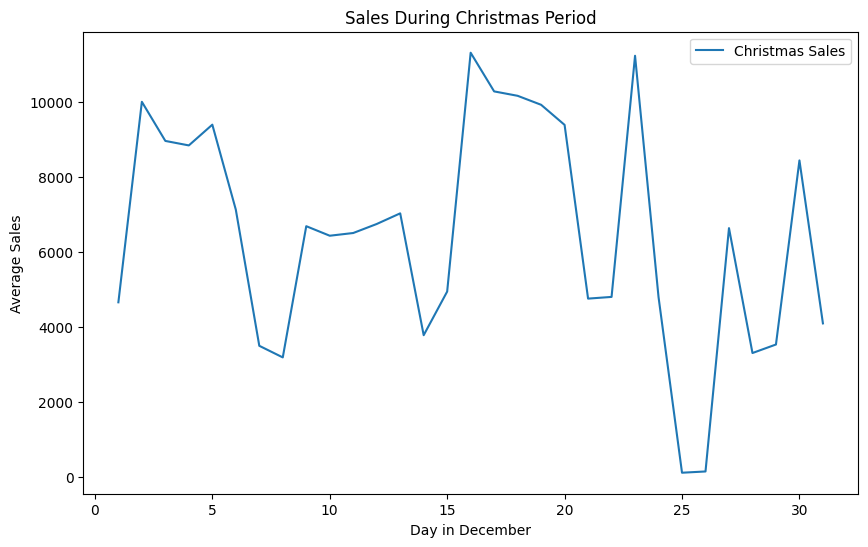

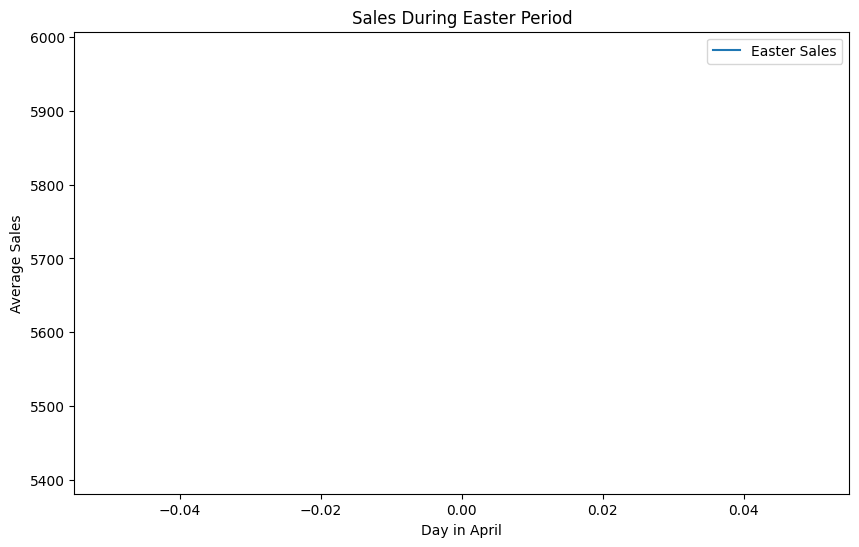

In [26]:
# Filter Christmas and Easter periods
christmas_sales = train_df[train_df['Date'].dt.month == 12].groupby(train_df['Date'].dt.day)['Sales'].mean()
easter_sales = train_df[(train_df['Date'].dt.month == 4) & (train_df['Date'].dt.day.between(10, 30))]['Sales'].mean()

# Plotting Christmas sales trends
plt.figure(figsize=(10, 6))
plt.plot(christmas_sales, label='Christmas Sales')
plt.title('Sales During Christmas Period')
plt.xlabel('Day in December')
plt.ylabel('Average Sales')
plt.legend()
plt.show()

# Plotting Easter sales trends
plt.figure(figsize=(10, 6))
plt.plot(easter_sales, label='Easter Sales')
plt.title('Sales During Easter Period')
plt.xlabel('Day in April')
plt.ylabel('Average Sales')
plt.legend()
plt.show()

### Correlation between sales and number of customers

In [27]:
# Correlation between sales and customers
correlation = train_df['Sales'].corr(train_df['Customers'])
print(f"Correlation between Sales and Customers: {correlation}")

Correlation between Sales and Customers: 0.8873674042024822


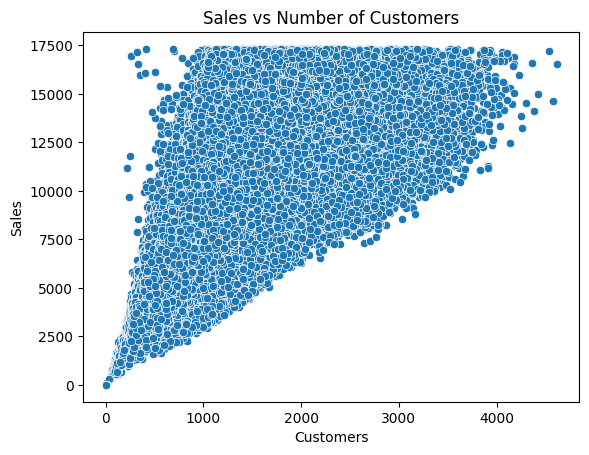

In [28]:
# Scatter plot of Sales vs Customers
sns.scatterplot(x='Customers', y='Sales', data=train_df)
plt.title('Sales vs Number of Customers')
plt.show()

### Effect of promotions on sales and customer behavior

Promo Sales:
Promo
0    4336.330427
1    7763.828833
Name: Sales, dtype: float64
Promo Customers:
Promo
0    508.084199
1    792.644836
Name: Customers, dtype: float64


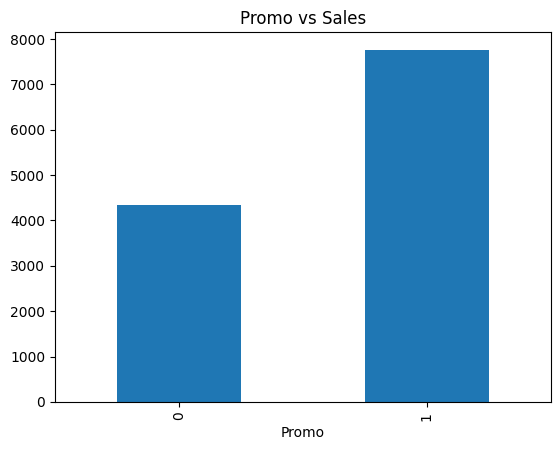

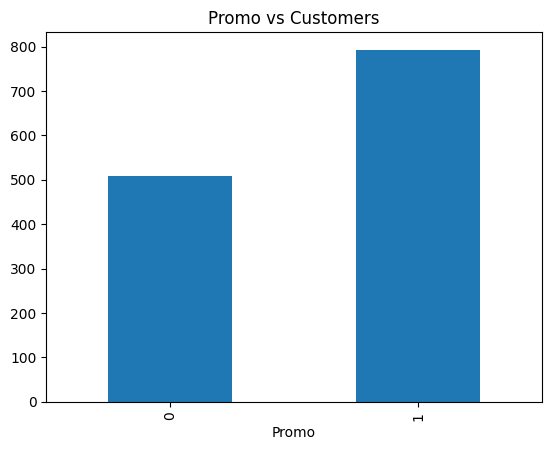

In [29]:
# Promo impact on sales and customers
promo_sales = train_df.groupby('Promo')['Sales'].mean()
promo_customers = train_df.groupby('Promo')['Customers'].mean()

print(f"Promo Sales:\n{promo_sales}")
print(f"Promo Customers:\n{promo_customers}")

# Visualize promo impact
promo_sales.plot(kind='bar', title='Promo vs Sales')
plt.show()

promo_customers.plot(kind='bar', title='Promo vs Customers')
plt.show()

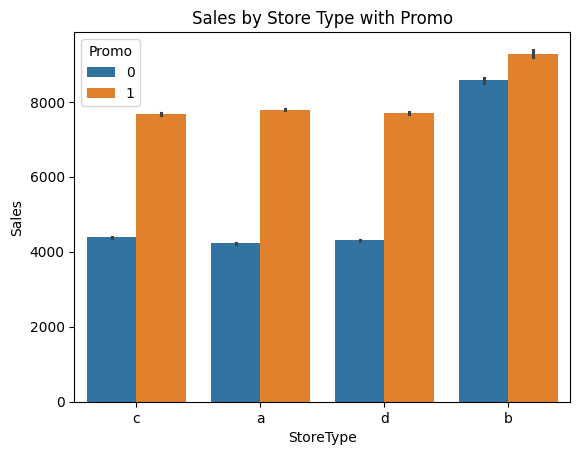

In [30]:
# Merge store_df with train_df to include Sales data
merged_df = train_df.merge(store_df, on='Store')

# Further explore sales by store type
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=merged_df)
plt.title('Sales by Store Type with Promo')
plt.show()

### Effective deployment of promotions

In [31]:
# Finding stores where promos are more effective
promo_effectiveness = train_df.groupby('Store').agg({
    'Promo': 'sum',
    'Sales': 'mean'
}).sort_values(by='Promo', ascending=False)

print(promo_effectiveness.head())

       Promo        Sales
Store                    
1        360  3945.704883
786      360  2950.813163
643      360  6653.539278
647      360  4806.015924
648      360  5471.351380


### Customer behavior during store opening and closing times

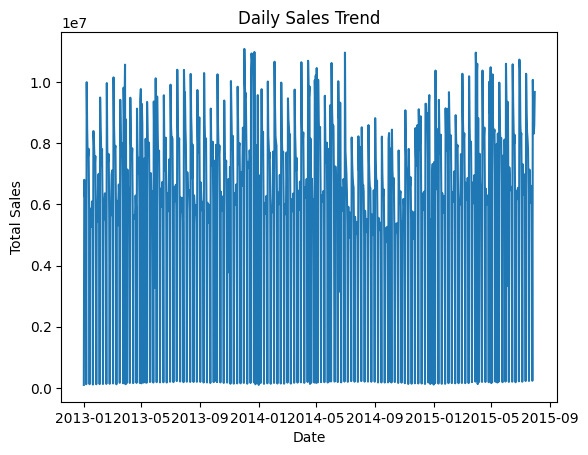

In [32]:
# Group by date to calculate daily sales
daily_sales = train_df.groupby('Date')['Sales'].sum()

# Plot daily sales trends
plt.plot(daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

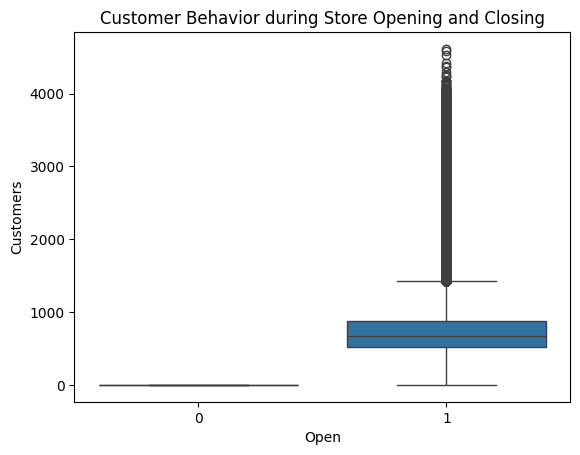

In [33]:
# Plot open vs close times for customer behavior
sns.boxplot(x='Open', y='Customers', data=train_df)
plt.title('Customer Behavior during Store Opening and Closing')
plt.show()

### Stores open on all weekdays and weekend sales comparison

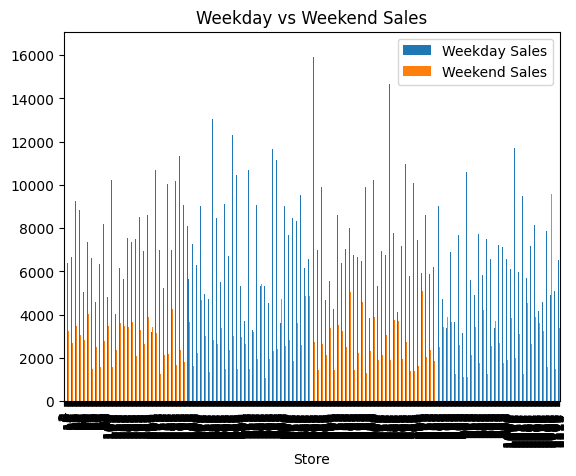

In [34]:
# Stores open on all weekdays
week_open_stores = train_df[train_df['DayOfWeek'].between(1, 5)].groupby('Store')['Open'].all()
weekend_sales = train_df[train_df['DayOfWeek'] > 5].groupby('Store')['Sales'].mean()

# Compare sales on weekdays vs weekends
week_sales = train_df[train_df['DayOfWeek'] <= 5].groupby('Store')['Sales'].mean()

sales_comparison = pd.DataFrame({
    'Weekday Sales': week_sales,
    'Weekend Sales': weekend_sales
}).plot(kind='bar')
plt.title('Weekday vs Weekend Sales')
plt.show()

### Effect of assortment type on sales

<Axes: title={'center': 'Average Sales by Assortment Type'}, xlabel='Assortment'>

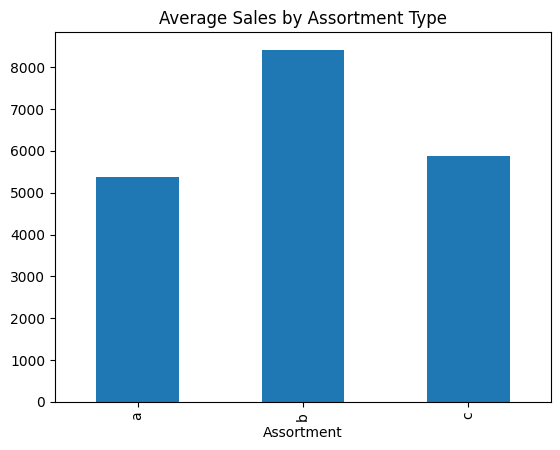

In [35]:
# Merging the DataFrames
merged_df = train_df.merge(store_df, on='Store')

# Now group by 'Assortment' and calculate the mean sales
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean()

# Plotting
assortment_sales.plot(kind='bar', title='Average Sales by Assortment Type')

In [36]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Distance to next competitor vs sales

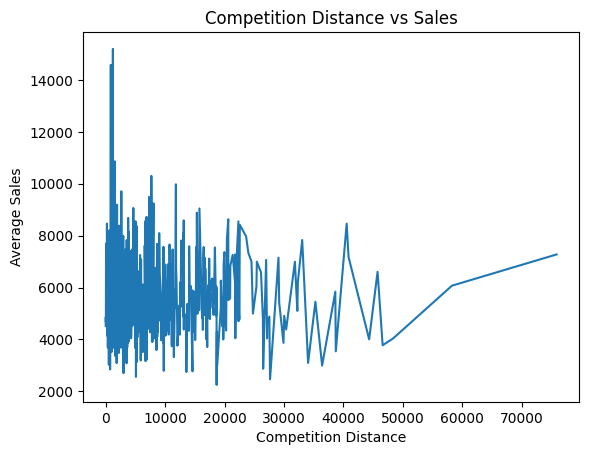

In [37]:
# Fill missing values in CompetitionDistance
merged_df['CompetitionDistance'].fillna(0, inplace=True)

# Group by CompetitionDistance and calculate the mean sales
distance_sales = merged_df.groupby('CompetitionDistance')['Sales'].mean()

# Plot the results
plt.plot(distance_sales)
plt.title('Competition Distance vs Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

### Effect of new competitors opening

In [38]:
# Filter stores where competitor distance was initially NA and later filled
stores_with_new_competition = merged_df[merged_df['CompetitionDistance'].notna() & (merged_df['CompetitionDistance'] == 0)].copy()

# Specify the actual date for comparison
comparison_date = '2015-01-01'  

# Check sales trends for those stores before and after competition
before_competition_sales = stores_with_new_competition[stores_with_new_competition['Date'] < comparison_date]['Sales'].mean()
after_competition_sales = stores_with_new_competition[stores_with_new_competition['Date'] >= comparison_date]['Sales'].mean()

print(f"Sales Before Competitor Opening: {before_competition_sales}")
print(f"Sales After Competitor Opening: {after_competition_sales}")

Sales Before Competitor Opening: 4526.83966033966
Sales After Competitor Opening: 4469.691823899371


In [40]:
from scripts.data_loader import save_data
save_data(merged_df, '../data/processed/train_df.csv')
save_data(merged_df, '../data/processed/test_df.csv')
save_data(merged_df, '../data/processed/store_df.csv')